<a href="https://colab.research.google.com/github/Jricardossilva/Data-Science/blob/main/Pontos_Chaves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import math
import matplotlib.pyplot as plt
import numpy as np
import zipfile

cv2.__version__

'4.1.2'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pose_path = '/content/drive/MyDrive/pose.zip'
zip_object = zipfile.ZipFile(file=pose_path, mode = 'r')
zip_object.extractall('./')

In [ ]:
imagens_path = '/content/drive/MyDrive/imagens.zip'
zip_object = zipfile.ZipFile(imagens_path, mode ='r')
zip_object.extractall('./')
zip_object.close()

In [ ]:
arquivo_proto = '/content/pose/body/mpi/pose_deploy_linevec_faster_4_stages.prototxt'
arquivo_pesos = '/content/pose/body/mpi/pose_iter_160000.caffemodel'

numero_pontos = 15
pares_pontos = [[0,1],[1,2],[2,3],[3,4],[1,5],[5,6],[6,7],[1,14],
                [14,8],[8,9],[9,10],[14,11],[11,12],[12,13]]

In [ ]:
pares_pontos

[[0, 1],
 [1, 2],
 [2, 3],
 [3, 4],
 [1, 5],
 [5, 6],
 [6, 7],
 [1, 14],
 [14, 8],
 [8, 9],
 [9, 10],
 [14, 11],
 [11, 12],
 [12, 13]]

In [ ]:
cor_ponto, cor_linha = (255,128,0), (7,62,248)

In [ ]:
imagem = cv2.imread('/content/imagens/body/single/single_3.jpg')

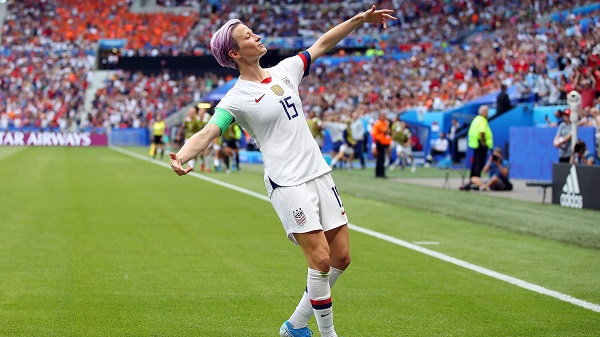

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(imagem)

In [ ]:
imagem_copia = np.copy(imagem)

In [ ]:
imagem_largura = imagem.shape[1]
imagem_altura = imagem.shape[0]

In [ ]:
imagem_largura, imagem_altura

(600, 337)

In [ ]:
modelo = cv2.dnn.readNetFromCaffe(arquivo_proto, arquivo_pesos)

In [ ]:
altura_entrada = 368
largura_entrada = int((altura_entrada / imagem_altura) * imagem_largura)

In [ ]:
largura_entrada

655

In [ ]:
blob_entrada = cv2.dnn.blobFromImage(imagem, 1.0 / 255, (largura_entrada, altura_entrada),
                                     (0,0,0), swapRB = False, crop = False)

In [ ]:
modelo.setInput(blob_entrada)
saida = modelo.forward()

In [ ]:
saida.shape

(1, 44, 46, 82)

In [ ]:
altura = saida.shape[2]
largura = saida.shape[3]

In [ ]:
altura, largura

(46, 82)

In [ ]:
pontos = []
limite = 0.1
for i in range (numero_pontos):
  mapa_confianca = saida[0,i, :,:]
  _, confianca, _, ponto = cv2.minMaxLoc(mapa_confianca)
  #print(confianca)
  #print(ponto)

  x = (imagem_largura * ponto[0]) / largura
  y = (imagem_altura * ponto[1]) / altura
  if confianca > limite:
    cv2.circle(imagem_copia, (int(x), int(y)), 5, cor_ponto, thickness = -1, lineType=cv2.FILLED)
    cv2.putText(imagem_copia, '{}'.format(i), (int(x), int(y)), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
                (0,0,255), 3, lineType=cv2.LINE_AA)
    pontos.append((int(x), int(y)))
  else:
    pontos.append(None)


In [ ]:
len(pontos)

15

In [ ]:
pontos

[(226, 21),
 (248, 65),
 (226, 95),
 (204, 131),
 (175, 153),
 (278, 65),
 (314, 43),
 (358, 14),
 (285, 183),
 (314, 256),
 (321, 329),
 (314, 168),
 (336, 256),
 (292, 315),
 (278, 124)]

In [ ]:
tamanho = cv2.resize(imagem, (imagem_largura, imagem_altura))
mapa_suave = cv2.GaussianBlur(tamanho, (3,3), 0, 0)
mascara_mapa = np.uint8(mapa_suave > limite)

In [ ]:
for par in pares_pontos:
  #print(par)
  parteA = par[0]
  parteB = par[1]

  if pontos[parteA] and pontos[parteB]:
    cv2.line(imagem, pontos[parteA], pontos[parteB], cor_linha, 2)
    cv2.circle(imagem, pontos[parteA], 5, cor_ponto, thickness=-1, lineType=cv2.LINE_AA)

    cv2.line(mascara_mapa, pontos[parteA], pontos[parteB], cor_linha, 2)
    cv2.circle(mascara_mapa, pontos[parteA], 5, cor_ponto, thickness=-1, lineType=cv2.LINE_AA)


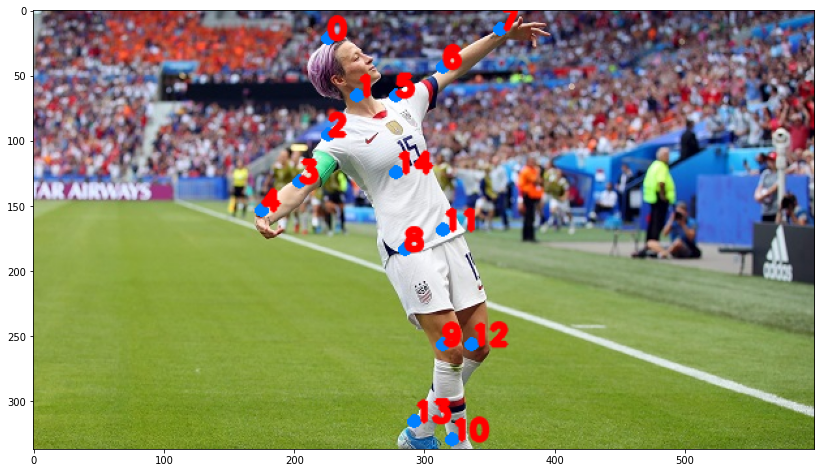

In [ ]:
plt.figure(figsize=[14,10])
plt.imshow(cv2.cvtColor(imagem_copia, cv2.COLOR_BGR2RGB))

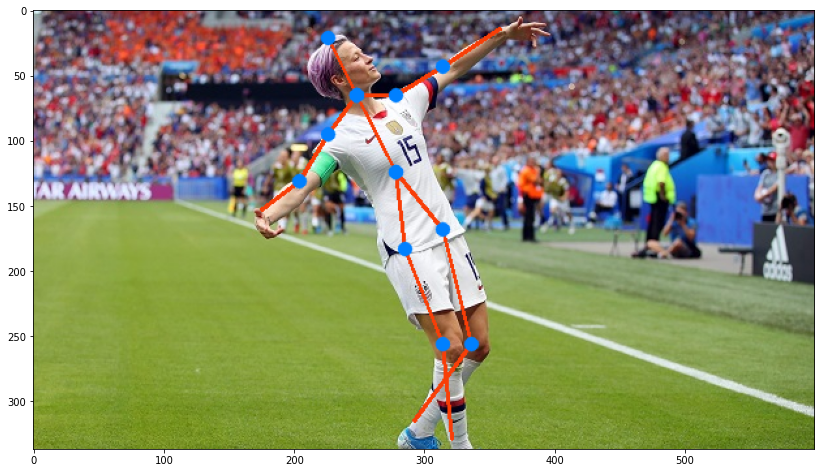

In [ ]:
plt.figure(figsize=[14,10])
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))

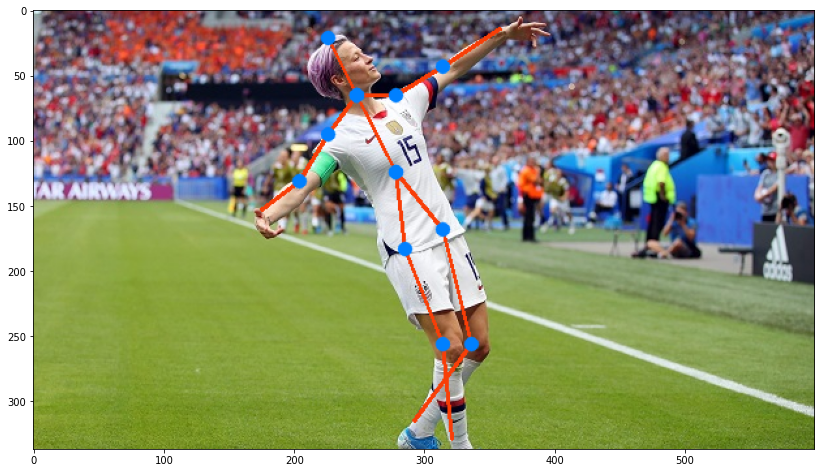

In [ ]:
def slope(pt1, pt2): # Slope das retas

    return (pt2[1] - pt1[1])/(pt2[0] - pt1[0])

def getAngle(pares_pontos):
    pt1, pt2, pt3 = pares_pontos[-3:]
    m1 = slope(pares_pontos[1], pares_pontos[5])
    m2 = slope(pares_pontos[1], pares_pontos[2])
    angR = math.atan((m2-m1)/(1 + (m2*m1)))
    angD = round(math.degrees(angR))
    if angD < 0:
        angD = angD + 360
    else:
        angD
    
    cv2.putText(imagem,str(angD),(200,200),cv2.FONT_HERSHEY_COMPLEX,1.5,(0,0,255),1, cv2.LINE_AA)

plt.figure(figsize=[14,10])
plt.imshow(cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB))

# Nova seção